In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

market_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])



In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    market_data_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)

# Copy the crypto names from the original DataFrame
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_data_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k = list(range (1,11))

In [8]:
# Create an empty list to store the inertia values
inertia = []

import warnings
# Suppress the specific UserWarning about the MKL memory leak
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows")

# Suppress the FutureWarning about `n_init` default value change
warnings.filterwarnings("ignore", message="The default value of `n_init` will change from 10 to 'auto' in 1.4.")


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters = i, random_state=0)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)
inertia


[287.0,
 195.82021818036043,
 123.19048183836956,
 79.02243535120975,
 65.302379141625,
 52.88851821977532,
 43.91469044757746,
 37.51703249010357,
 32.485240832183536,
 28.22289929060893]

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow=pd.DataFrame(elbow_data)

In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value is k=4.
The most optimal value for k is when the inertia starts to decrease more slowly hence at k=4. The point represents the trade-off between the number of clusters and the reduction in inertia. After k = 4, the rate of decrease in inertia slows down, meaning that increasing k beyond this point yields diminishing returns in terms of clustering performance.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [11]:
# Initialise the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)

In [12]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=0)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(clusters)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [14]:
# Create a copy of the scaled DataFrame
df_market_data_with_clusters = df_market_data_scaled.copy()

In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_with_clusters['Cluster'] = clusters

# Display the copy of the scaled DataFrame
df_market_data_with_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [16]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

df_market_data_with_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',  # Color by the cluster labels
    hover_cols=['coin_id'],  # Assuming coin_id column has the names of the cryptocurrencies
    title='Cryptocurrency Clusters by K-Means',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)'
)


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimise Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce the original scaled Dataframe
# down to three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)

# View the scaled PCA data
pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

In [20]:
total_explained_variance = explained_variance.sum()
total_explained_variance


0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.895031657030984

In [21]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
df_market_data_pca['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_data_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
df_market_data_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [22]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range (1,11))
k_pca

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [23]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_pca:
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(df_market_data_pca)
        inertia_pca.append(kmeans.inertia_)

print(inertia_pca)



[256.87408556789234, 165.90199402035998, 93.77462568057298, 49.665496651797355, 37.87874703346249, 27.618971787957427, 21.18277586295733, 17.389823204768888, 13.59365037987673, 10.559357562793434]


In [24]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_pca, 'inertia': inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_pca.head()


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747


In [25]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia'
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' when using PCA data is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The value for 'k' is the same value found using the original data.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [26]:
# Initialise the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)


In [27]:
# Fit the K-Means model using the scaled PCA DataFrame
kmeans.fit(pca_data)


KMeans(n_clusters=4, random_state=0)

In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters = kmeans.predict(pca_data)

# Print the resulting array of cluster values.
print(clusters)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [29]:
# Create a copy of the scaled PCA DataFrame
df_pca_with_clusters = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_with_clusters['coin_id'] = df_market_data.index
df_pca_with_clusters['Cluster'] = clusters
df_pca_with_clusters.set_index('coin_id', inplace=True)

# Display the copy of the scaled PCA DataFrame
df_pca_with_clusters.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [30]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_pca_with_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',  # Color by the cluster labels
    hover_cols=['coin_id'],  # Show the cryptocurrency names when hovering
    title='Cryptocurrency Clusters by K-Means (PCA)',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2'
)



:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

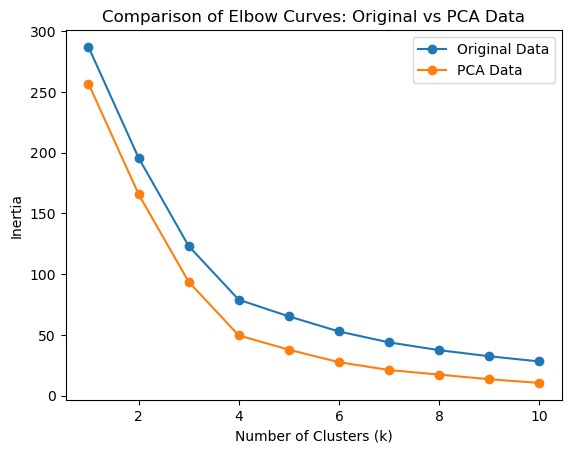

In [31]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt
plt.plot(k, inertia, marker='o', label='Original Data')

plt.plot(k_pca, inertia_pca, marker='o', label='PCA Data')

plt.title('Comparison of Elbow Curves: Original vs PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()

plt.show()

In [40]:
# Composite plot to contrast the clusters
cluster_plot_original = df_market_data_with_clusters.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    c='Cluster', 
    hover_cols=['coin_id'], 
    title='K-Means Clusters (Original Data)'
)

cluster_plot_pca = df_pca_with_clusters.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='Cluster', 
    hover_cols=['coin_id'], 
    title='K-Means Clusters (PCA Data)'
)

cluster_plot_original + cluster_plot_pca

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** By using fewer features to cluster the data PCA helps reduce overlap between clusters, making the groups more distint. By reducing the number of dimensions, the clustering becomes faster and simpler and outliers are more easier to identify.